In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets  import load_boston
from sklearn import preprocessing
import numpy as np
from sklearn.linear_model import SGDRegressor, LinearRegression, LogisticRegression
from sklearn.tree  import  DecisionTreeRegressor
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import auc
from sklearn import neighbors as nb
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
X, y = load_boston(return_X_y=True)

# K-fold

In [3]:
train = KFold(n_splits=5, shuffle=True, random_state=42)
train.get_n_splits(X, y);

### Gradiente Descedente

In [4]:
gd_rmse = []
gd_mae = []
for train_index, test_index in train.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    std_scale = preprocessing.StandardScaler().fit(X_train)
    X_train_std = std_scale.transform(X_train)
    X_test_std = std_scale.transform(X_test)
    
    
    clf = linear_model.SGDRegressor()
    clf.fit(X_train_std, y_train);
    y_pred_gd = clf.predict(X_test_std)
    
    rmse_gradiente = np.sqrt(metrics.mean_squared_error(y_test,y_pred_gd))
    mae_gradiente = metrics.mean_absolute_error(y_test, y_pred_gd)
    
    gd_rmse.append(rmse_gradiente)
    gd_mae.append(mae_gradiente)
    
print(np.mean(gd_rmse))
print(np.mean(gd_mae)) 
 

4.964727418471645
3.3251192900509934


##  Linear Regression

In [5]:
linear_rmse = []
linaer_mae = []
for train_index, test_index in train.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    std_scale = preprocessing.StandardScaler().fit(X_train)
    X_train_std = std_scale.transform(X_train)
    X_test_std = std_scale.transform(X_test)
   
    model = LinearRegression()
    model.fit(X_train_std, y_train)
  
    y_pred_linear = model.predict(X_test_std)
    rme_linear = np.sqrt(metrics.mean_squared_error(y_test, y_pred_linear))
    mae_linear = metrics.mean_absolute_error(y_test,y_pred_linear)
   
    linear_rmse.append(rme_linear)
    linaer_mae.append(mae_linear)
    
print (np.mean(linear_rmse)) 
print (np.mean(linaer_mae))

4.843271055765915
3.3907477744403764


## KNN

In [6]:
knn_rmse = []
knn_mae = []

for train_index, test_index in train.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    std_scale = preprocessing.StandardScaler().fit(X_train)
    X_train_std = std_scale.transform(X_train)
    X_test_std = std_scale.transform(X_test)
   
    model_knn = nb.KNeighborsRegressor()
    model_knn.fit(X_train_std, y_train)
    y_pred_k = model_knn.predict(X_test_std)
   
    rmse_knn = np.sqrt(metrics.mean_squared_error(y_test, y_pred_k))
    mae_knn = metrics.mean_absolute_error(y_test, y_pred_k)
  
    knn_rmse.append(rmse_knn)
    knn_mae.append(mae_knn)
    
    
print(np.mean(knn_rmse))
print(np.mean(knn_mae))
    
    

4.560714535240072
2.872253154727237


## SVM

In [7]:
rmse = []
mae = []
for train_index, test_index in train.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    std_scale = preprocessing.StandardScaler().fit(X_train)
    X_train_std = std_scale.transform(X_train)
    X_test_std = std_scale.transform(X_test)
    
    model_svm = svm.SVR()
    model_svm.fit(X_train_std, y_train);
    y_pred_svm = model_svm.predict(X_test_std)
    
    rmse_svm = np.sqrt(metrics.mean_squared_error(y_test, y_pred_svm))
    mae_svm = metrics.mean_absolute_error(y_test,y_pred_svm)
    rmse.append(rmse_svm)
    mae.append(mae_svm)
    
print(np.mean(rmse))
print(np.mean(mae))

5.462335257746601
3.1936967701885886


## KNN foi o melhor modelo

In [10]:
model_final = nb.KNeighborsRegressor();
model_final.fit(X,y);

std_scale = preprocessing.StandardScaler().fit(X)
X = std_scale.transform(X)

y_pred_final = model_final.predict(X);

# Classificação

In [11]:
from sklearn.datasets import load_breast_cancer

In [12]:
X,y = load_breast_cancer(return_X_y=True)
data = load_breast_cancer()
data.feature_names
df = pd.DataFrame(data.data, columns=data.feature_names)

# Normalização

In [15]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

## K-fold

In [167]:
train = KFold(n_splits=5, shuffle=True, random_state=42);
train.get_n_splits(X, y);

for train_index, test_index in train.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]



## Logistic Regression

[[40  3]
 [ 0 71]]


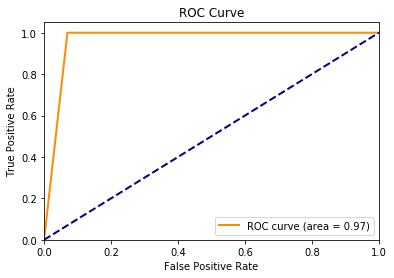

[[34  3]
 [ 1 76]]


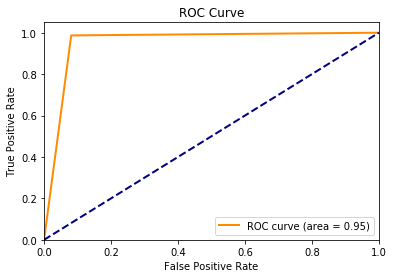

[[39  4]
 [ 0 71]]


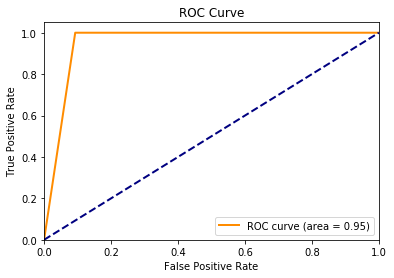

[[39  4]
 [ 1 70]]


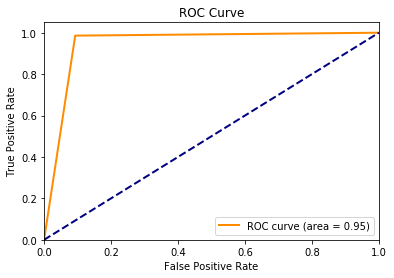

[[39  7]
 [ 0 67]]


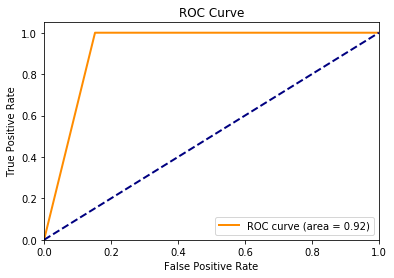

0.95954044403043
0.9439005587866347
0.9945856959941466
0.9684287820441952


In [16]:
#Accuracy, Precision, Recall, F1-Measure, AOC
Lg_acuracy = []
lg_precision = []
lg_recall = []
lg_Measure = []
lg_AUC = []
media_fpr = []
media_tpr = []


for train_index, test_index in train.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    scaler = preprocessing.MinMaxScaler()
    scaler.fit(X_train)
    X_train_std = scaler.transform(X_train)
    X_test_std = scaler.transform(X_test)
    
   
    model_logistic = LogisticRegression()
    model_logistic.fit(X_train_std, y_train);
    
    y_pred_logistic = model_logistic.predict(X_test_std)
   
    Lg_acuracy.append(metrics.accuracy_score(y_test, y_pred_logistic))
    lg_precision.append(metrics.precision_score(y_test, y_pred_logistic))
    lg_recall.append(metrics.recall_score(y_test, y_pred_logistic))
    lg_Measure.append(metrics.f1_score(y_test, y_pred_logistic))
    fpr, tpr, thr = metrics.roc_curve(y_test, y_pred_logistic)
    roc = metrics.auc(fpr, tpr)
    
    cm = metrics.confusion_matrix(y_test, y_pred_logistic);
    print (cm)
    
    plt.figure();
    plt.plot(fpr, tpr, color='darkorange',
    lw=2, label='ROC curve (area = %0.2f)' % roc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
print(np.mean(Lg_acuracy))
print(np.mean(lg_precision))
print(np.mean(lg_recall))
print(np.mean(lg_Measure))
    


# KNN

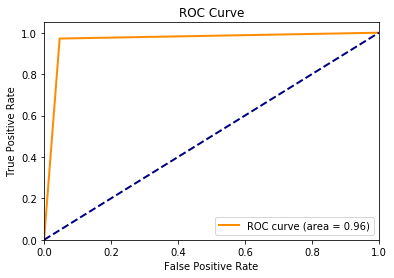

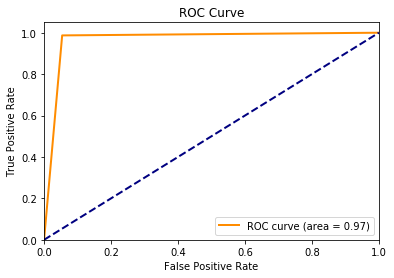

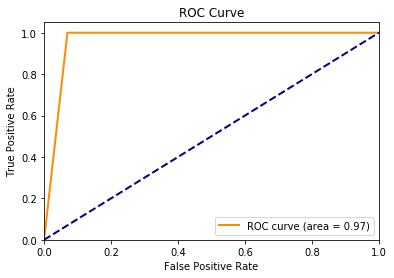

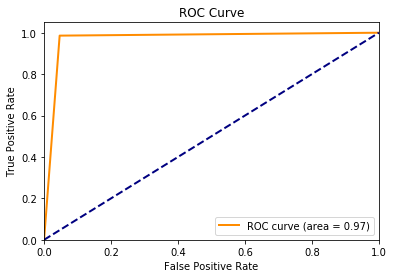

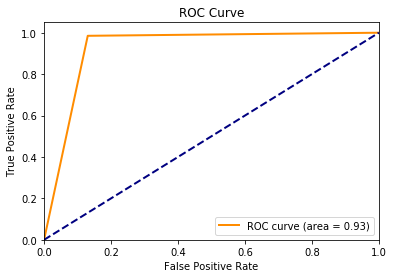

Acurácia:  0.964803601925167
Precisão:  0.9589076617245633
Recall:  0.9859668185503796
F1:  0.972089551764833
AUC:  0.958255455841473


In [169]:
knn_acuracy = []
knn_precision = []
knn_recall = []
knn_Measure = []
knn_auc = []


for train_index, test_index in train.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    modelCKnn = nb.KNeighborsClassifier();
    modelCKnn.fit(X_train, y_train)
    y_pred_cknn = modelCKnn.predict(X_test)
    knn_acuracy.append(metrics.accuracy_score(y_test, y_pred_cknn))
    knn_precision.append(metrics.precision_score(y_test, y_pred_cknn)) 
    knn_recall.append(metrics.recall_score(y_test, y_pred_cknn))
    knn_Measure.append(metrics.f1_score(y_test, y_pred_cknn))
    fpr, tpr, thr = metrics.roc_curve(y_test, y_pred_cknn)
    roc =  metrics.auc(fpr, tpr)
    knn_auc.append(roc)
      
    plt.figure();
    plt.plot(fpr, tpr, color='darkorange',
    lw=2, label='ROC curve (area = %0.2f)' % roc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
print("Acurácia: ", np.mean(knn_acuracy))
print("Precisão: ", np.mean(knn_precision))
print("Recall: ", np.mean(knn_recall))
print("F1: ", np.mean(knn_Measure))
print("AUC: ", np.mean(knn_auc))





# Naive Bayes 



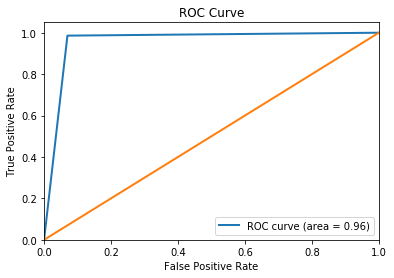

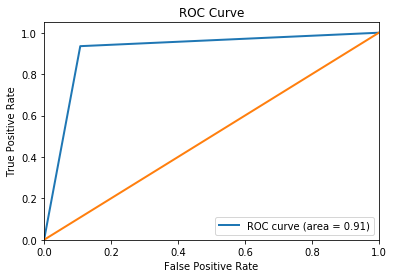

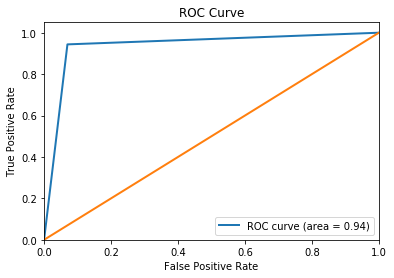

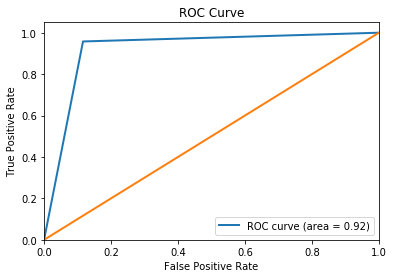

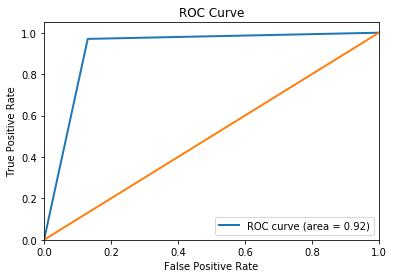

Acurácia:  0.964803601925167
Precisão:  0.9589076617245633
Recall:  0.9859668185503796
F1: 0.972089551764833
Auc: 0.958255455841473


In [170]:
nb_acuracy = []
nb_precision = []
nb_recall = []
nb_Measure = []
nb_auc = []

all_fpr = []
all_tpr = []
soma_fpr = []
soma_tpr = []

for train_index, test_index in train.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model_nb = GaussianNB()
    model_nb.fit(X_train.astype(float), y_train.astype(int));
    y_pred_nb = model_nb.predict(X_test)
    nb_acuracy.append(metrics.accuracy_score(y_test,y_pred_nb))
    nb_precision.append(metrics.precision_score(y_test,y_pred_nb))
    nb_recall.append(metrics.recall_score(y_test,y_pred_nb))
    nb_Measure.append(metrics.f1_score(y_test,y_pred_nb))
    fpr, tpr, thr = metrics.roc_curve(y_test, y_pred_nb )
    roc = metrics.auc(fpr, tpr)
    nb_auc.append(roc)
    
    plt.figure();
    plt.plot(fpr, tpr,
    lw=2, label='ROC curve (area = %0.2f)' % roc)
    plt.plot([0, 1], [0, 1], lw=2,)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
print("Acurácia: ", np.mean(knn_acuracy))
print("Precisão: ", np.mean(knn_precision))
print("Recall: ", np.mean(knn_recall))
print("F1:",  np.mean(knn_Measure))
print("Auc:",  np.mean(knn_auc))




## SVM

0.0
1.4864864864864864


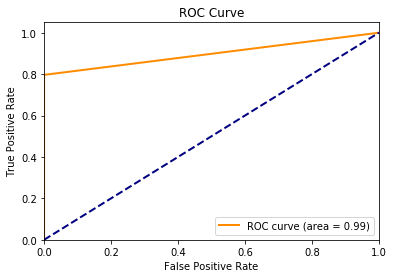

0.9525229001707809
0.9317631521123177
0.9971830985915492
0.9632989001763164
0.9905872121456074


In [22]:
svm_acuracy = []
svm_precision = []
svm_recall = []
svm_Measure = []
svm_roc = []
all_fpr = []
all_tpr = []
soma_fpr = []
soma_tpr = []
i = 0;
for train_index, test_index in train.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = svm.SVC(probability=True)
    model.fit(X_train, y_train);
    
    y_pred_svm = model.predict(X_test)
    svm_acuracy.append(metrics.accuracy_score(y_test,y_pred_svm))
    svm_precision.append(metrics.precision_score(y_test,y_pred_svm))
    svm_recall.append(metrics.recall_score(y_test,y_pred_svm))
    svm_Measure.append(metrics.f1_score(y_test,y_pred_svm))
    
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thr = metrics.roc_curve(y_test, y_prob)
   
    all_fpr.append(fpr)
    all_tpr.append(tpr)
    roc = metrics.auc(fpr, tpr)
    svm_roc.append(roc);    
    soma_fpr.append(all_fpr[i][1])
    soma_tpr.append(all_tpr[i][1])
    i = i+1

print(np.sum(soma_fpr))    
print(np.sum(all_fpr[:][1]))    
plt.figure();
plt.plot([0,np.mean(soma_fpr),1],[0,np.mean(soma_tpr),1], color='darkorange',
lw=2, label='ROC curve (area = %0.2f)' % np.mean(svm_roc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
print( np.mean(svm_acuracy))
print( np.mean(svm_precision))
print( np.mean(svm_recall))
print( np.mean(svm_Measure))
print( np.mean(svm_roc))



In [20]:
y_test.shape, y_prob.shape

((114,), (114, 2))

## Melhor modelo foi KNN

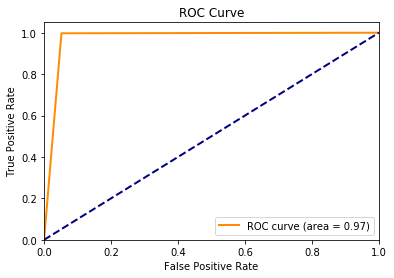

Acurácia:  [0.9789103690685413]
Precisão:  [0.9700272479564033]
Recall:  [0.9971988795518207]
F1:  [0.9834254143646408]
AUC:  0.9726560435494952


In [172]:
final_acuracy = []
final_precision = []
final_recall = []
final_Measure = []
auc = []

model_final = nb.KNeighborsClassifier();
model_final.fit(X,y);
y_pred_final = model_final.predict(X);
    
final_acuracy.append(metrics.accuracy_score(y, y_pred_final))
final_precision.append(metrics.precision_score(y,y_pred_final))
final_recall.append(metrics.recall_score(y,y_pred_final))
final_Measure.append(metrics.f1_score(y,y_pred_final))
fpr, tpr, thr = metrics.roc_curve(y,y_pred_final)

roc = metrics.auc(fpr, tpr)
auc = roc
plt.figure();
plt.plot(fpr, tpr, color='darkorange',
lw=2, label='ROC curve (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
    
print("Acurácia: ",final_acuracy)
print("Precisão: ",final_precision)
print("Recall: ",final_recall)
print("F1: ", final_Measure)
print("AUC: ", auc)


